In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize']=[15,8]
from warnings import filterwarnings
filterwarnings('ignore')
pd.options.display.max_columns=None

# Obejctive: Predict whether the cancer is benign or malignant

# About Dataset

Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image.

In [2]:
df=pd.read_csv('breast-cancer.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [3]:
df.shape

(569, 32)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [5]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


#  DISTRIBUTION OF VARIABLES

UNIVARIATE ANALYSIS FOR NUMERIC VARIABLES

In [6]:
# List of Numerical columns
df.select_dtypes(include=[np.number]).columns

Index(['id', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

The variables with ID's are not selected in the num_cols because they are all unique numbers which might disturb the accuracy of the model.

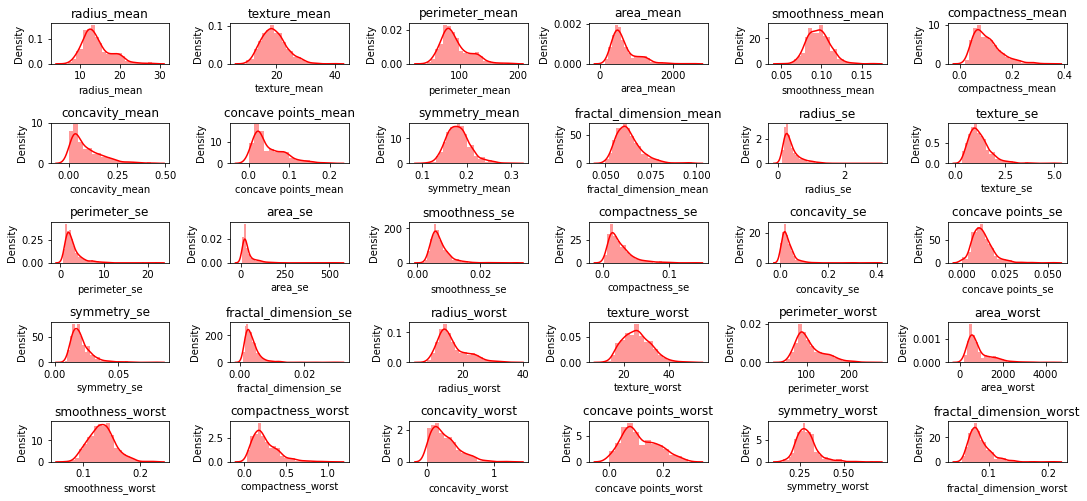

In [7]:
num_cols=['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst']
nrows=6
ncols=6
iterator=1
for i in num_cols:
    plt.subplot(nrows,ncols,iterator)
    sns.distplot(df.loc[:,i],color='red')
    plt.title(i)
    iterator+=1
plt.tight_layout()
plt.show()

In [8]:
df.skew()

id                         6.473752
radius_mean                0.942380
texture_mean               0.650450
perimeter_mean             0.990650
area_mean                  1.645732
smoothness_mean            0.456324
compactness_mean           1.190123
concavity_mean             1.401180
concave points_mean        1.171180
symmetry_mean              0.725609
fractal_dimension_mean     1.304489
radius_se                  3.088612
texture_se                 1.646444
perimeter_se               3.443615
area_se                    5.447186
smoothness_se              2.314450
compactness_se             1.902221
concavity_se               5.110463
concave points_se          1.444678
symmetry_se                2.195133
fractal_dimension_se       3.923969
radius_worst               1.103115
texture_worst              0.498321
perimeter_worst            1.128164
area_worst                 1.859373
smoothness_worst           0.415426
compactness_worst          1.473555
concavity_worst            1

The distribution of the variables is fairly good.

UNIVARIATE ANALYSIS FOR TARGET CATEGORICAL VARIABLE

<AxesSubplot:xlabel='diagnosis', ylabel='count'>

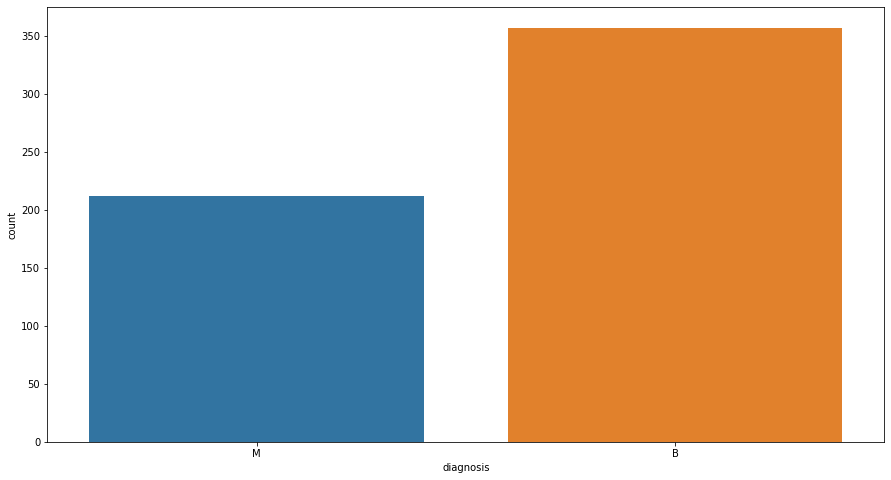

In [9]:
sns.countplot(df['diagnosis'])

There are more datapoints about Benign breast cancer than Malignant breast cancer in the dataset.

# Bivariate Analysis

Numerical vs target variable

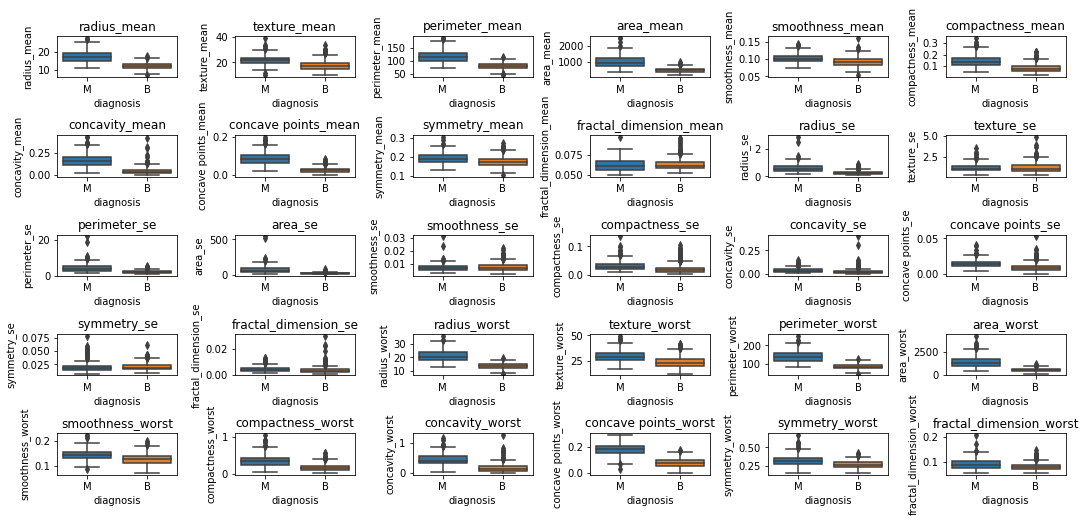

In [10]:
num_cols=['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst']
nrows=6
ncols=6
iterator=1
for i in num_cols:
    plt.subplot(nrows,ncols,iterator)
    sns.boxplot(df.diagnosis,df.loc[:,i])
    plt.title(i)
    iterator+=1
plt.tight_layout()
plt.show()

# MISSING VALUE TREATMENT

In [11]:
Total = df.isnull().sum().sort_values(ascending = False)          

Percent = (df.isnull().sum()*100/df.isnull().count()).sort_values(ascending = False)   

missing_data = pd.concat([Total, Percent], axis = 1, keys = ['Total', 'Percentage of Missing Values'])    
missing_data

,Total,Percentage of Missing Values
id,0,0.0
diagnosis,0,0.0
symmetry_worst,0,0.0
concave points_worst,0,0.0
concavity_worst,0,0.0
compactness_worst,0,0.0
smoothness_worst,0,0.0
area_worst,0,0.0
perimeter_worst,0,0.0
texture_worst,0,0.0


Therefore No missing values in the dataset.

In [12]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Remove unwanted variables

In [13]:
df=df.drop('id',axis=1)

In [14]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


# Outlier Detection

<AxesSubplot:>

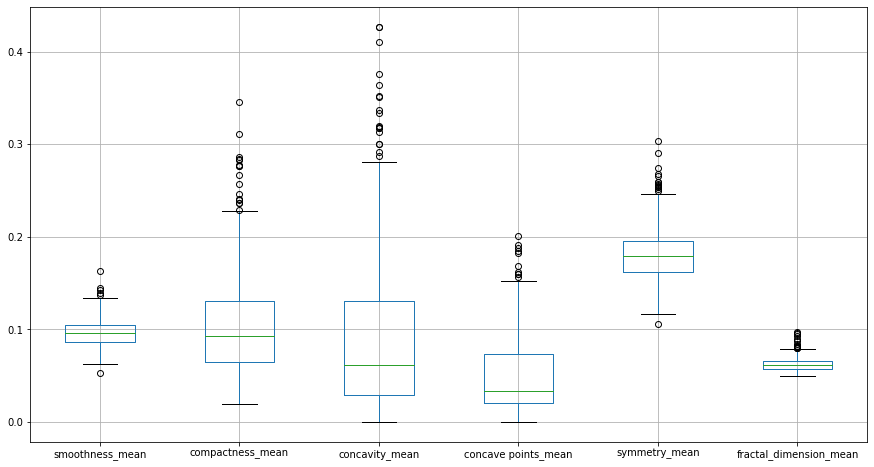

In [21]:
df.iloc[:,5:11].boxplot()

There are outliers in the dataset

# Scale the data

We scale the variables to get all the variables in the same range. With this, we can avoid a problem in which some features come to dominate solely because they tend to have larger values than others.
Extreme outlies often influence the sample mean / variance in a negative way. Therefore, Standard Scaler and Min-Max scaler might not work very well here. We use RobustScaler as a replacement. This scaler is more robust to outliers by removing the median and scaling the data according to the quantile range.

In [22]:
from sklearn.preprocessing import RobustScaler
rs=RobustScaler()
df_std=rs.fit_transform(df.drop('diagnosis',axis=1))
df_column=df.drop('diagnosis',axis=1)
df_std_frame=pd.DataFrame(data=df_std,columns=df_column.columns)
df_std_frame.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1.132353,-1.502664,1.263740,1.241446,1.190174,2.824832,2.358711,2.115850,1.855030,2.039192,3.126978,-0.316669,3.599086,4.713606,0.006382,1.475994,1.032641,0.698529,1.358173,1.301299,1.801038,-0.935185,2.105595,2.343063,1.051020,2.364252,1.807750,1.715248,2.635556,1.884578
1,1.764706,-0.190053,1.612859,2.138245,-0.587956,-0.213653,0.250742,0.682995,0.059172,-0.578385,0.889655,-0.584440,0.634495,1.812363,-0.387974,-0.380485,-0.270401,0.349265,-0.581731,0.149351,1.733564,-0.231481,1.480746,2.232284,-0.255102,-0.131839,0.055514,0.892194,-0.106667,0.435500
2,1.549020,0.428064,1.512617,1.798841,0.725304,1.027337,1.343287,1.758242,0.819527,-0.184086,1.709533,-0.501640,1.312393,2.542063,-0.077259,1.012390,0.461053,1.364536,0.453125,0.599134,1.487889,0.013889,1.328167,1.797960,0.445578,1.107869,0.833458,1.483052,1.171852,0.365664
3,-0.477941,0.273535,-0.299343,-0.455298,2.463286,2.921045,1.778327,1.335444,2.381657,4.263658,0.695335,0.074988,0.661336,0.098756,0.917031,2.794528,1.139466,1.094457,4.915865,2.606494,-0.010381,0.126157,0.029305,-0.208897,2.670068,3.410109,1.714605,1.633358,5.653333,4.508244
4,1.696078,-0.799290,1.688904,2.058223,0.234020,0.613470,1.349219,1.318681,0.050296,-0.321853,1.756592,-0.510389,1.799543,2.557059,1.716493,0.214765,1.149481,1.119910,-0.140625,0.834632,1.309689,-1.011574,1.320901,1.562335,0.207483,-0.035956,0.645678,0.648595,-0.678519,-0.158099


In [23]:
df_target=df['diagnosis'].copy()
df_final=pd.concat([df_target,df_std_frame],axis=1)

In [24]:
df_final.shape

(569, 31)

**Interpretation:** Now we use these 30 standardized variables to find the principal components. So all the variables are scaled.

#    MODELLING

# Random Forest Classifier

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import statsmodels.api as sm
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
X=df_final.drop('diagnosis',axis=1)
y=df_final['diagnosis']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=10)
rf=RandomForestClassifier(random_state=10)
rf_model=rf.fit(X_train,y_train)
y_pred=rf_model.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           B       1.00      0.97      0.99        75
           M       0.95      1.00      0.97        39

    accuracy                           0.98       114
   macro avg       0.98      0.99      0.98       114
weighted avg       0.98      0.98      0.98       114



In [26]:
rf=RandomForestClassifier(random_state=10)
rf_model=rf.fit(X_train,y_train)
y_pred_train=rf_model.predict(X_train)
print(classification_report(y_train,y_pred_train))

              precision    recall  f1-score   support

           B       1.00      1.00      1.00       282
           M       1.00      1.00      1.00       173

    accuracy                           1.00       455
   macro avg       1.00      1.00      1.00       455
weighted avg       1.00      1.00      1.00       455



In [27]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_pred))

[[73  2]
 [ 0 39]]


# KNN Classifier

In [29]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn_model=knn.fit(X_train,y_train)
y_pred=knn_model.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           B       0.97      1.00      0.99        75
           M       1.00      0.95      0.97        39

    accuracy                           0.98       114
   macro avg       0.99      0.97      0.98       114
weighted avg       0.98      0.98      0.98       114



In [30]:
from sklearn.ensemble import GradientBoostingClassifier
gbm=GradientBoostingClassifier()
gbm_model=gbm.fit(X_train,y_train)
y_pred=gbm_model.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           B       1.00      0.96      0.98        75
           M       0.93      1.00      0.96        39

    accuracy                           0.97       114
   macro avg       0.96      0.98      0.97       114
weighted avg       0.98      0.97      0.97       114



# Hyperparameter tuning

In [31]:
rf=RandomForestClassifier(random_state=10)
tuned_para={'n_estimators':[90,100,110,120],'criterion':['giny','entropy','log_loss'],'min_samples_split':[1,2,3]}
from sklearn.model_selection import GridSearchCV
grid=GridSearchCV(estimator=rf,param_grid=tuned_para,cv=3,scoring='accuracy')
grid_model=grid.fit(X_train,y_train)
print('Best_parameters are ',grid_model.best_params_)

Best_parameters are  {'criterion': 'entropy', 'min_samples_split': 3, 'n_estimators': 100}


In [32]:
rf_grid=RandomForestClassifier(criterion='entropy',n_estimators=100,min_samples_split=3,random_state=10)
rf_model_grid=rf_grid.fit(X_train,y_train)
y_pred=rf_model_grid.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           B       1.00      0.97      0.99        75
           M       0.95      1.00      0.97        39

    accuracy                           0.98       114
   macro avg       0.98      0.99      0.98       114
weighted avg       0.98      0.98      0.98       114



# Model Selection

Before selecting the best model for our dataset lets understand the buisness importance of this classification problem:

Benign tumors are those that stay in their primary location without invading other sites of the body. They do not spread to local structures or to distant parts of the body. Benign tumors tend to grow slowly and have distinct borders. Benign tumors are not usually problematic.

Malignant tumors have cells that grow uncontrollably and spread locally and/or to distant sites. Malignant tumors are cancerous (ie, they invade other sites). They spread to distant sites via the bloodstream or the lymphatic system.
They are highly dangerous.

Now, we need to classify whether the patient is having benign tumor or malignant tumor therefore we need to make sure that the model built gives more importance in predicting Malignant cancer accurately.

So,we have built three classifier mmodels for our Breast Cancer Prediction data (Random Forest, KNN and GradientBsooting) out of which Random Forest Classifier has been chosen as our best model because we have a recall of 1 for the Malignant class. Also, the accuracy of the model is 98% and a 0.97 recall for the Benign class.
The model also has a good f1-score there

# Principal Component Analysis (PCA)

It is an unsupervised dimension reduction technique used to transform the higher dimensional dataset to a lower dimension. It considers the linear combination of all the numerical variables and create principal components that are orthogonal to each other. These principal components explain most of the variance in the data with lower dimension. 

In [33]:
# Covariance Matrix
cov_mat=np.cov(df_std.T)
print(cov_mat[0:5])

[[ 0.7460424   0.21364807  0.72391728  0.82814151  0.10946495  0.35258879
   0.46074647  0.51345559  0.10350079 -0.22570288  0.65987584 -0.07244142
   0.67238185  1.05756273 -0.19391613  0.16450184  0.18781299  0.28348344
  -0.08952505 -0.04218921  0.70025737  0.18249308  0.67841861  0.81378722
   0.0802373   0.2928011   0.35375431  0.43799235  0.12979578  0.00534574]
 [ 0.21364807  0.58361886  0.21144785  0.23819582 -0.01327485  0.14584689
   0.18210227  0.16202787  0.04424141 -0.04896483  0.23709366  0.25437163
   0.24846992  0.33029806  0.0050959   0.13559081  0.12256781  0.10921362
   0.00692775  0.04765539  0.225229    0.49565301  0.22259886  0.26275496
   0.04598222  0.17401939  0.17875158  0.15372278  0.07352673  0.0797664 ]
 [ 0.72391728  0.21144785  0.70547115  0.80461519  0.12934671  0.37728997
   0.47410902  0.51656816  0.12468536 -0.18415686  0.6536588  -0.06280281
   0.67223505  1.04114889 -0.17170674  0.19471143  0.21449533  0.29842034
  -0.06812044 -0.00531416  0.6809065

In [34]:
# Eigenvalues and Eigenvectors
from numpy.linalg import eig

eig_val, eig_vec = np.linalg.eig(cov_mat)

print('Eigenvalues:','\n','\n', eig_val,"\n")

print('Eigenvectors:','\n','\n',eig_vec,'\n')

Eigenvalues: 
 
 [1.15962958e+01 5.05174912e+00 2.65151264e+00 1.44422529e+00
 1.18594543e+00 9.84178375e-01 6.80676816e-01 4.07217908e-01
 3.79622326e-01 2.78654048e-01 2.46361508e-01 1.97075214e-01
 1.72501915e-01 1.13943569e-01 7.72154405e-02 7.49926201e-02
 5.62599401e-02 4.65184432e-02 3.66059636e-02 2.50092366e-02
 2.39165014e-02 9.64429335e-05 5.93392829e-04 1.18939979e-03
 4.32757345e-03 6.48187963e-03 1.06799944e-02 1.81460566e-02
 1.43227421e-02 1.61953616e-02] 

Eigenvectors: 
 
 [[-2.09532469e-01 -1.71915454e-01  9.05477691e-02 -8.70613867e-02
   1.06198655e-03 -4.85621315e-02 -1.96707897e-01 -2.01351465e-01
  -5.02665474e-02 -2.92876592e-02  3.50860132e-02  1.19499588e-03
   4.85489135e-02 -3.40412794e-02  1.65672367e-02 -7.48928289e-02
   1.14850967e-01  3.20183608e-01 -8.82789697e-02 -6.03587186e-02
   1.13134382e-01 -6.91228003e-01 -2.16854676e-01 -2.56416997e-01
   4.18282219e-02 -1.99577837e-01 -7.72458774e-02  8.05320253e-02
  -7.58820945e-02  1.57618248e-01]
 [-8.12

In [35]:
# Decide the number of Principal Components
eig_val=list(eig_val)
eig_val.sort(reverse=True)
print(eig_val)

[11.596295838305448, 5.051749121486163, 2.6515126398860804, 1.4442252935007927, 1.1859454337853574, 0.9841783749393107, 0.6806768156524158, 0.4072179078055191, 0.3796223262741313, 0.2786540481548766, 0.24636150835345788, 0.19707521394042996, 0.17250191492534483, 0.11394356939132626, 0.07721544047710203, 0.07499262014344775, 0.05625994012387975, 0.046518443227698644, 0.03660596358226389, 0.02500923659018223, 0.023916501381578414, 0.01814605655638818, 0.01619536159602306, 0.014322742072289797, 0.010679994448083662, 0.006481879628635536, 0.004327573449632453, 0.001189399786626086, 0.0005933928285521923, 9.644293347876728e-05]


In [36]:
# Percentage of explained variation method to find the number of components
percent_var=[]
for i in eig_val:
    variation=(i/sum(eig_val))*100
    percent_var.append(variation)
print(percent_var)

[44.94250904670004, 19.578517464524055, 10.276180641398089, 5.597227703024622, 4.59624039693175, 3.814273638412108, 2.6380254843349995, 1.5782103837911539, 1.4712611743266446, 1.0799493437147563, 0.9547966412998911, 0.7637830828824722, 0.6685470067516213, 0.44159876305219253, 0.2992555278491576, 0.2906407835939744, 0.21804056254171494, 0.18028649706342376, 0.14186977224439906, 0.09692559222165997, 0.09269059660900052, 0.07032670796941125, 0.06276661057917664, 0.055509101710835486, 0.04139129889358237, 0.025121119529160123, 0.016771908169840748, 0.0046096280584712315, 0.0022997483797680403, 0.0003737734420367432]


In [37]:
np.cumsum(percent_var)

array([ 44.94250905,  64.52102651,  74.79720715,  80.39443486,
        84.99067525,  88.80494889,  91.44297438,  93.02118476,
        94.49244593,  95.57239528,  96.52719192,  97.290975  ,
        97.95952201,  98.40112077,  98.7003763 ,  98.99101708,
        99.20905765,  99.38934414,  99.53121391,  99.62813951,
        99.7208301 ,  99.79115681,  99.85392342,  99.90943252,
        99.95082382,  99.97594494,  99.99271685,  99.99732648,
        99.99962623, 100.        ])

**Interpretation**: We can see that the first five components explain approximately 84% of the variation in the data. To explain 99% of the variation in the data, we need to consider 17 principal components.

For this dataset, let us choose the 17` principal components that explain 99% of the variation.

In [38]:
# PCA using Python Library
from sklearn.decomposition import PCA
pca=PCA(n_components=17,random_state=0)
pca_model=pca.fit_transform(df_std)

In [39]:
# PCA dataframe
df_pca=pd.DataFrame(data=pca_model,columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11','PC12','PC13','PC14','PC15','PC16','PC17'])
df_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17
0,8.786469,1.576272,-0.771192,-2.574112,-2.501443,0.977125,1.693493,-0.104300,-0.323681,-0.636750,0.226336,0.815467,-0.263382,-0.626881,-0.271033,-0.423860,0.763565
1,2.565749,-3.081944,-0.812141,0.691809,-0.833530,0.088102,-0.394138,-1.174877,0.055744,0.987846,0.201042,-0.044756,-0.554948,-0.587069,0.442375,-0.072488,-0.572215
2,5.152275,-0.633878,-0.939216,-0.301168,-0.499502,0.549339,-0.597331,-0.208898,-0.021880,0.215917,-0.568820,-0.371231,-0.200129,0.255092,0.258354,0.409681,0.227240
3,4.420060,9.262221,-3.060719,-4.616453,0.395816,2.212384,1.178598,-1.216591,0.654488,-1.300568,0.156124,-1.183837,-0.483687,-0.258586,0.366050,-0.170152,0.180583
4,4.282610,-1.317156,1.166263,0.634178,-2.095514,-0.738984,-1.580056,-0.339362,0.360671,0.367428,0.226746,0.285864,0.143024,-0.577763,-0.257800,0.346894,-0.063070


In [40]:
df_pca.shape

(569, 17)

**Interpretation**: In the above step, we obtained the data with reduced dimensions. The new dataset has 569 observations and 17 columns. 

# Modelling after PCA

In [41]:
df_final_pca=pd.concat([df_target,df_pca],axis=1)
df_final_pca.head()

,diagnosis,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17
0,M,8.786469,1.576272,-0.771192,-2.574112,-2.501443,0.977125,1.693493,-0.104300,-0.323681,-0.636750,0.226336,0.815467,-0.263382,-0.626881,-0.271033,-0.423860,0.763565
1,M,2.565749,-3.081944,-0.812141,0.691809,-0.833530,0.088102,-0.394138,-1.174877,0.055744,0.987846,0.201042,-0.044756,-0.554948,-0.587069,0.442375,-0.072488,-0.572215
2,M,5.152275,-0.633878,-0.939216,-0.301168,-0.499502,0.549339,-0.597331,-0.208898,-0.021880,0.215917,-0.568820,-0.371231,-0.200129,0.255092,0.258354,0.409681,0.227240
3,M,4.420060,9.262221,-3.060719,-4.616453,0.395816,2.212384,1.178598,-1.216591,0.654488,-1.300568,0.156124,-1.183837,-0.483687,-0.258586,0.366050,-0.170152,0.180583
4,M,4.282610,-1.317156,1.166263,0.634178,-2.095514,-0.738984,-1.580056,-0.339362,0.360671,0.367428,0.226746,0.285864,0.143024,-0.577763,-0.257800,0.346894,-0.063070


In [42]:
X_pca=df_final_pca.drop('diagnosis',axis=1)
y_pca=df_final_pca['diagnosis']
X_pca_train,X_pca_test,y_pca_train,y_pca_test=train_test_split(X_pca,y_pca,test_size=0.2,random_state=10)

In [43]:
rf=RandomForestClassifier(random_state=10)
rf_model_pca=rf.fit(X_pca_train,y_pca_train)
y_pca_pred=rf_model_pca.predict(X_pca_test)
print(classification_report(y_pca_test,y_pca_pred))

              precision    recall  f1-score   support

           B       1.00      0.99      0.99        75
           M       0.97      1.00      0.99        39

    accuracy                           0.99       114
   macro avg       0.99      0.99      0.99       114
weighted avg       0.99      0.99      0.99       114



In [44]:
rf=RandomForestClassifier(random_state=10)
rf_model_pca=rf.fit(X_pca_train,y_pca_train)
y_pca_pred_train=rf_model_pca.predict(X_pca_train)
print(classification_report(y_pca_train,y_pca_pred_train))

              precision    recall  f1-score   support

           B       1.00      1.00      1.00       282
           M       1.00      1.00      1.00       173

    accuracy                           1.00       455
   macro avg       1.00      1.00      1.00       455
weighted avg       1.00      1.00      1.00       455



# K-Means Clustering


Let us perform the centroid-based clustering algorithm (i.e. K-Means). Such algorithms are efficient but sensitive to initial conditions and outliers. K-means is the most widely-used centroid-based clustering algorithm.

Here we consider two techniques (elbow/scree plot and Silhouette score) to decide the optimal value of `K` to perform the K-means clustering.

# Optimal Value of K Using Elbow Plot

Elbow plot is plotted with the value of K on the x-axis and the WCSS (Within Cluster Sum of Squares) on the y-axis. The value of K corresponding to the elbow point represents the optimal value for K.

In [45]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
wcss=[]
for i in range(1,21):
    kmeans=KMeans(n_clusters=i,random_state=10)
    kmeans.fit(df_std_frame)
    wcss.append(kmeans.inertia_)

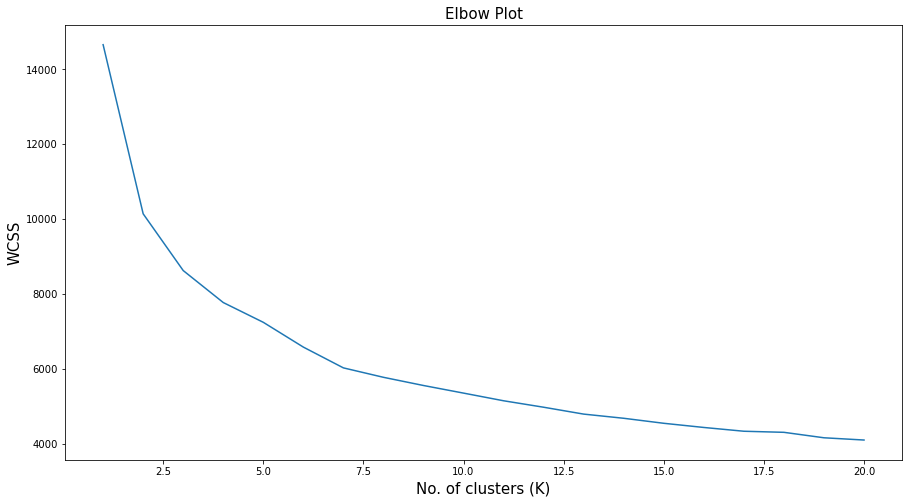

In [46]:
# visualize the elbow plot to get the optimal value of K
plt.plot(range(1,21), wcss)

# set the axes and plot labels
# set the font size using 'fontsize'
plt.title('Elbow Plot', fontsize = 15)
plt.xlabel('No. of clusters (K)', fontsize = 15)
plt.ylabel('WCSS', fontsize = 15)

# display the plot
plt.show()

# Optimal Value of K Using Silhouette Score

The Silhouette score can also be used to identify the optimal number of clusters. We plot the Silhouette score for different values of K. The `K` with the highest Silhouette score represents the optimal value for the number of clusters (K).

In [47]:
n_clusters=[2,3,4,5,6]
for k in n_clusters:
    cluster=KMeans(n_clusters=k,random_state=10)
    predict=cluster.fit_predict(df_std_frame)
    score=silhouette_score(df_std_frame,predict,random_state=10)
    print ("For {} clusters the silhouette score is {})".format(k, score))

For 2 clusters the silhouette score is 0.3642674464256542)
For 3 clusters the silhouette score is 0.31367332544177007)
For 4 clusters the silhouette score is 0.3205545778215708)
For 5 clusters the silhouette score is 0.17162917175322687)
For 6 clusters the silhouette score is 0.16329391176244454)


So we will choose k as 2 clusters for our KMeans clustering method.

In [48]:
new_clusters=KMeans(n_clusters=2,random_state=10)
new_clusters.fit(df_std_frame)
# Add the cluster labels to our main dataframe
df['Cluster']=new_clusters.labels_

In [49]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Cluster
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,1
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,1


In [50]:
df['Cluster'].value_counts()

0    401
1    168
Name: Cluster, dtype: int64

Text(0, 0.5, 'Number of Customers')

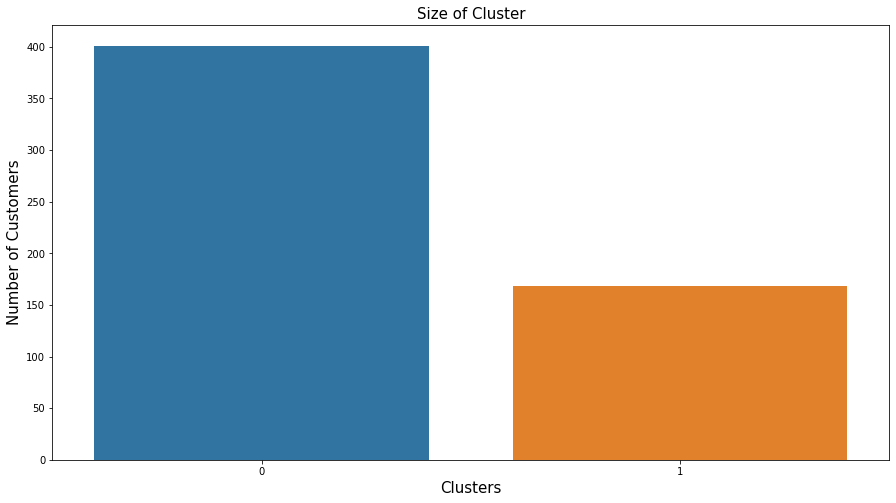

In [51]:
# using 'seaborn' library to plot a barplot for cluster size
sns.countplot(data= df, x = 'Cluster')
plt.title('Size of Cluster', fontsize = 15)
plt.xlabel('Clusters', fontsize = 15)
plt.ylabel('Number of Customers', fontsize = 15)

The 0th cluster is the largest cluster having 401 observations.

Lets see how well the clusters are distributed.

<AxesSubplot:xlabel='radius_mean', ylabel='texture_mean'>

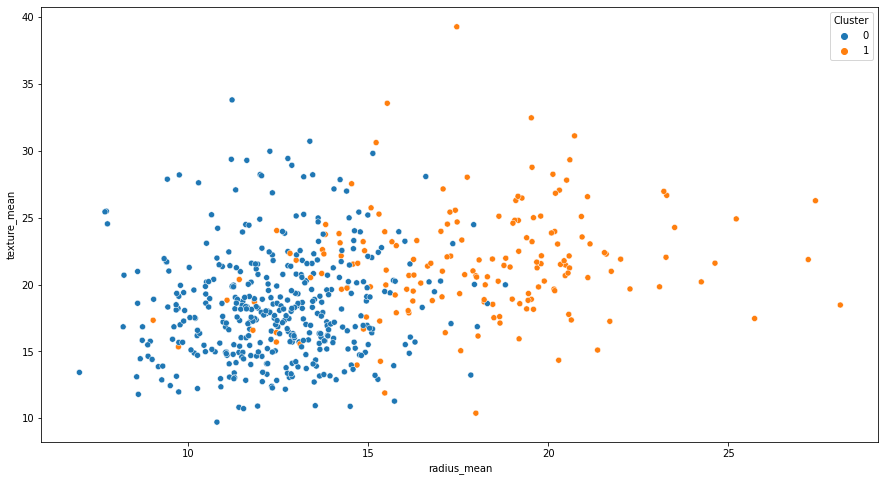

In [52]:
sns.scatterplot(data=df,x='radius_mean',y='texture_mean',hue='Cluster')

<AxesSubplot:xlabel='smoothness_mean', ylabel='compactness_mean'>

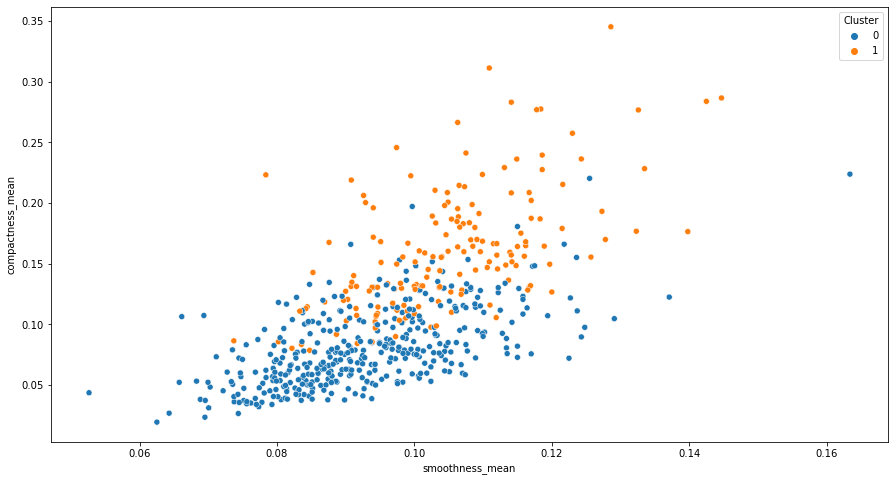

In [53]:
sns.scatterplot(data=df,x='smoothness_mean',y='compactness_mean',hue='Cluster')

As we can see the points are beautifully separated using clustering.

<AxesSubplot:xlabel='diagnosis'>

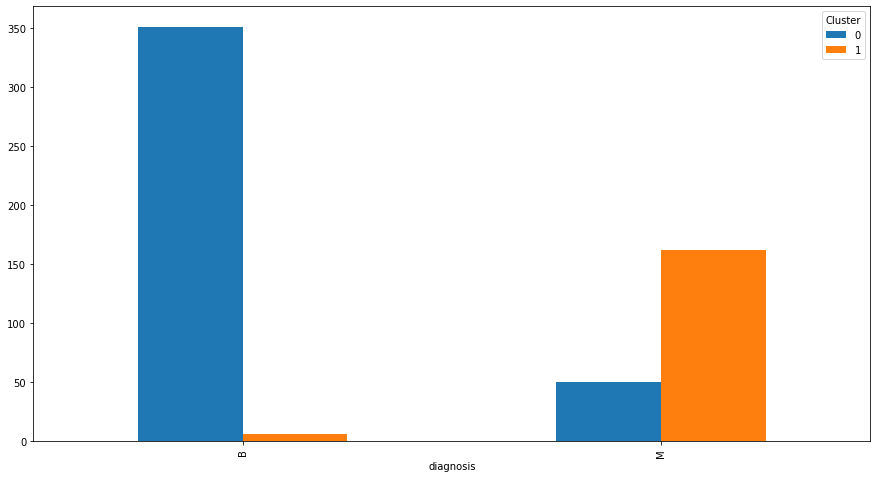

In [54]:
pd.crosstab(df['diagnosis'],df['Cluster']).plot(kind='bar')

It is able is separate out well the two types of cancer Benign and Malignant.

In [55]:
# Numerical variables for cluster 0
df[df['Cluster']==0].describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Cluster
count,401.000000,401.000000,401.000000,401.000000,401.000000,401.000000,401.000000,401.000000,401.000000,401.000000,401.000000,401.000000,401.000000,401.000000,401.000000,401.000000,401.000000,401.000000,401.000000,401.000000,401.000000,401.000000,401.000000,401.000000,401.000000,401.000000,401.000000,401.000000,401.000000,401.000000,401.0
mean,12.492666,18.331421,80.368005,492.199252,0.092789,0.080822,0.047942,0.028325,0.174182,0.062217,0.290088,1.199852,2.035069,22.491541,0.006996,0.020202,0.023618,0.009698,0.019908,0.003343,13.894736,24.279925,90.412618,608.168828,0.126633,0.190697,0.177762,0.081133,0.274604,0.079547,0.0
std,1.996268,4.049607,13.219091,158.870823,0.013145,0.031905,0.035365,0.017542,0.023775,0.006354,0.115948,0.573026,0.789788,10.339896,0.002979,0.013654,0.019235,0.004757,0.006870,0.002186,2.407082,5.731084,16.203554,215.001064,0.020607,0.096863,0.129255,0.040764,0.046348,0.013818,0.0
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.0
25%,11.270000,15.510000,71.900000,388.100000,0.083710,0.057430,0.022600,0.016670,0.158600,0.057810,0.211600,0.795900,1.477000,15.890000,0.005038,0.011320,0.011680,0.006565,0.015010,0.002030,12.360000,19.930000,79.730000,467.600000,0.111800,0.120200,0.083240,0.055560,0.243900,0.069690,0.0
50%,12.430000,17.920000,79.830000,476.500000,0.091380,0.076080,0.039960,0.025480,0.171800,0.061250,0.262300,1.083000,1.928000,20.240000,0.006261,0.015870,0.018720,0.009166,0.018690,0.002778,13.650000,23.500000,88.520000,570.700000,0.126500,0.175800,0.154700,0.079660,0.271000,0.077290,0.0
75%,13.700000,20.390000,88.370000,579.100000,0.100700,0.101700,0.067370,0.037310,0.189300,0.065400,0.349100,1.471000,2.466000,26.850000,0.008200,0.024440,0.030160,0.011960,0.022870,0.003892,15.340000,27.980000,100.300000,719.800000,0.140200,0.242600,0.250000,0.105600,0.303500,0.085530,0.0
max,18.810000,33.810000,120.900000,1102.000000,0.163400,0.223900,0.228000,0.090290,0.274300,0.095750,1.214000,4.885000,8.077000,106.000000,0.021770,0.093680,0.153500,0.034870,0.061460,0.021930,21.310000,41.780000,139.200000,1410.000000,0.200600,0.584900,0.772700,0.225800,0.488200,0.148600,0.0


In [56]:
# Categorical variable for cluster 0
df[df['Cluster']==0].describe(include=object)

,diagnosis
count,401
unique,2
top,B
freq,351


**Interpretation:** The above summary shows that approx 90% of this cluster belongs to Benign tumor category.

In [57]:
# Numerical variables for cluster 1
df[df['Cluster']==1].describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Cluster
count,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.0
mean,18.028988,21.576845,119.659583,1043.214286,0.104885,0.160479,0.186323,0.098076,0.197823,0.064185,0.679866,1.257435,4.849554,82.932679,0.007149,0.038072,0.051647,0.016805,0.022057,0.004874,21.936786,29.012440,147.477202,1530.810119,0.146059,0.405997,0.497574,0.194502,0.327005,0.094445,1.0
std,3.311146,4.021352,22.251628,381.454019,0.012457,0.050495,0.071018,0.030572,0.028391,0.008372,0.348781,0.496184,2.606483,64.749694,0.003064,0.020441,0.040693,0.006284,0.010774,0.003272,4.441032,5.825406,30.047825,623.152495,0.022101,0.169880,0.188427,0.040045,0.076983,0.022244,0.0
min,9.029000,10.380000,58.790000,250.500000,0.073710,0.078640,0.084220,0.043750,0.130800,0.050240,0.211400,0.550300,1.719000,13.990000,0.003139,0.011120,0.017150,0.008185,0.009947,0.001575,10.310000,16.670000,65.500000,324.700000,0.088220,0.151600,0.222000,0.091810,0.160300,0.055250,1.0
25%,15.627500,18.907500,103.775000,769.775000,0.096655,0.126700,0.137600,0.078423,0.179400,0.057240,0.444775,0.923475,3.165750,46.730000,0.005409,0.024677,0.031872,0.012795,0.015412,0.003272,18.730000,25.225000,127.050000,1083.750000,0.132050,0.281575,0.363350,0.167150,0.278650,0.079052,1.0
50%,18.235000,21.445000,120.550000,1036.500000,0.104500,0.155400,0.169100,0.090575,0.194700,0.062400,0.612200,1.165000,4.255500,69.830000,0.006457,0.032330,0.042540,0.015485,0.018975,0.004193,22.140000,28.200000,146.200000,1489.000000,0.144500,0.383800,0.464000,0.192750,0.310900,0.090680,1.0
75%,20.165000,23.822500,132.600000,1252.500000,0.113150,0.187125,0.218975,0.110675,0.213125,0.070200,0.831425,1.475250,5.667000,102.050000,0.008113,0.046885,0.056438,0.018648,0.024295,0.005504,24.365000,32.150000,162.800000,1819.500000,0.157675,0.479550,0.609850,0.218175,0.364500,0.105025,1.0
max,28.110000,39.280000,188.500000,2501.000000,0.144700,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,3.568000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.0


In [58]:
# Categorical variables for cluster 1
df[df['Cluster']==1].describe(include=object)

,diagnosis
count,168
unique,2
top,M
freq,162


**Interpretation:** The above summary shows that 96.4% of this cluster belongs to Malignant tumor category.

So according to the characteristics the Kmeans clustering has clustered it into two groups Benign and Malignant.